In [1]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.gridspec as gridspec
init_notebook_mode(connected=True)
import cufflinks as cf
%matplotlib inline
cf.go_offline()

In [44]:
df = pd.read_csv(r"C:\Users\lordn\Milestone Projects\WebScraping and Data Analysis\Lagos_Real_Estate.csv")

In [45]:
df.head()

,title,location,desc,price,bath,bed,toilet,area
0,2 bedroom flat / apartment for rent,"Glover Lsdpc Estate, Adekunle, Yaba, Lagos",A lovely luxury bigger 2br flat @ adekunle by ...,1200000,2 Bathrooms,2 Bedrooms,3 Toilets,yaba
1,3 bedroom flat / apartment for rent,"Akoka, Yaba, Lagos","Decent and lovely 3bed ground floor, with mast...",1000000,2 Bathrooms,3 Bedrooms,2 Toilets,yaba
2,Self contained (single rooms) for rent,"Off Ikorodu Road, Jibowu Yaba Lagos, Jibowu, Y...",It's a new buildingparking spacebalconytiled f...,450000,NaN,NaN,NaN,yaba
3,1 bedroom mini flat for rent,"Bono Way, Yaba, Lagos",A lovely exclusive mini flat @ adekunle by ala...,1200000,NaN,NaN,2 Toilets,yaba
4,Office space for rent,"Herbert Macaulay Way, Yaba, Lagos",Lovely 140sqm open plan corporate office space...,2500000,NaN,NaN,5 Toilets,yaba


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4964 entries, 0 to 4963
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4964 non-null   object
 1   location  4964 non-null   object
 2   desc      4927 non-null   object
 3   price     4964 non-null   object
 4   bath      3401 non-null   object
 5   bed       3429 non-null   object
 6   toilet    3758 non-null   object
 7   area      4964 non-null   object
dtypes: object(8)
memory usage: 310.4+ KB


In [47]:
df.describe()

,title,location,desc,price,bath,bed,toilet,area
count,4964,4964,4927,4964,3401,3429,3758,4964
unique,95,1959,4481,214,10,9,10,9
top,3 bedroom flat / apartment for rent,"Lekki Phase 1, Lekki, Lagos","Please check out my other properties listed, w...",3500000,4 Bathrooms,4 Bedrooms,5 Toilets,lekki
freq,773,549,40,305,1221,1274,1168,3108


In [48]:
#check for the data types of objects in each column

cols = list(df.columns)
for col in cols:
    data_types = {type(x) for x in df[col]}
    print(f"Data types in column {col} : ", data_types)

Data types in column title :  {<class 'str'>}
Data types in column location :  {<class 'str'>}
Data types in column desc :  {<class 'float'>, <class 'str'>}
Data types in column price :  {<class 'str'>}
Data types in column bath :  {<class 'float'>, <class 'str'>}
Data types in column bed :  {<class 'float'>, <class 'str'>}
Data types in column toilet :  {<class 'float'>, <class 'str'>}
Data types in column area :  {<class 'str'>}


In [49]:
#replace all null entries with zero

df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,title,location,desc,price,bath,bed,toilet,area
0,2 bedroom flat / apartment for rent,"Glover Lsdpc Estate, Adekunle, Yaba, Lagos",A lovely luxury bigger 2br flat @ adekunle by ...,1200000,2 Bathrooms,2 Bedrooms,3 Toilets,yaba
1,3 bedroom flat / apartment for rent,"Akoka, Yaba, Lagos","Decent and lovely 3bed ground floor, with mast...",1000000,2 Bathrooms,3 Bedrooms,2 Toilets,yaba
2,2 bedroom flat / apartment for rent,"Alagomeji, Yaba, Lagos",Newly built all rooms en-suite 2 bedroom flat ...,1800000,2 Bathrooms,2 Bedrooms,3 Toilets,yaba
3,3 bedroom flat / apartment for rent,"Alagomeji, Yaba, Lagos",A lovely and nice good 3 bedroom flat in alago...,2500000,4 Bathrooms,3 Bedrooms,3 Toilets,yaba
4,2 bedroom flat / apartment for rent,"Alagomeji, Yaba, Lagos",Check out this home that just hit the market. ...,1500000,2 Bathrooms,2 Bedrooms,3 Toilets,yaba


In [50]:
df["area"] = df["area"].apply(str.capitalize)
df.head()

,title,location,desc,price,bath,bed,toilet,area
0,2 bedroom flat / apartment for rent,"Glover Lsdpc Estate, Adekunle, Yaba, Lagos",A lovely luxury bigger 2br flat @ adekunle by ...,1200000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
1,3 bedroom flat / apartment for rent,"Akoka, Yaba, Lagos","Decent and lovely 3bed ground floor, with mast...",1000000,2 Bathrooms,3 Bedrooms,2 Toilets,Yaba
2,2 bedroom flat / apartment for rent,"Alagomeji, Yaba, Lagos",Newly built all rooms en-suite 2 bedroom flat ...,1800000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
3,3 bedroom flat / apartment for rent,"Alagomeji, Yaba, Lagos",A lovely and nice good 3 bedroom flat in alago...,2500000,4 Bathrooms,3 Bedrooms,3 Toilets,Yaba
4,2 bedroom flat / apartment for rent,"Alagomeji, Yaba, Lagos",Check out this home that just hit the market. ...,1500000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba


In [51]:
#clean title

def clean_title(title):
    if "/" in title:
        new_title = title.split("/")[0]
        return new_title
    else:
        new_title = title.replace("for rent", "")
        return new_title

df["title"] = df["title"].apply(clean_title)

df.head(10)

,title,location,desc,price,bath,bed,toilet,area
0,2 bedroom flat,"Glover Lsdpc Estate, Adekunle, Yaba, Lagos",A lovely luxury bigger 2br flat @ adekunle by ...,1200000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
1,3 bedroom flat,"Akoka, Yaba, Lagos","Decent and lovely 3bed ground floor, with mast...",1000000,2 Bathrooms,3 Bedrooms,2 Toilets,Yaba
2,2 bedroom flat,"Alagomeji, Yaba, Lagos",Newly built all rooms en-suite 2 bedroom flat ...,1800000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
3,3 bedroom flat,"Alagomeji, Yaba, Lagos",A lovely and nice good 3 bedroom flat in alago...,2500000,4 Bathrooms,3 Bedrooms,3 Toilets,Yaba
4,2 bedroom flat,"Alagomeji, Yaba, Lagos",Check out this home that just hit the market. ...,1500000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
5,2 bedroom flat,"Off Muritala Muhammad Road, Ebute Metta East, ...","Now letting at ebuta metta, yabaexecutive newl...",1400000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
6,2 bedroom flat,"Akoka, Yaba, Lagos","Decent all rooms en-suite 2 bedroom flat , pop...",1500000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
7,2 bedroom flat,"Glover, By Lsdpc Estate, Adekunle, Yaba, Lagos",A lovely bigger 2br flat @ adekunle by lsdpc e...,1200000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
8,3 bedroom flat,"Off Alara Street, Alagomeji, Yaba, Lagos",A tastefully finished executive newly renovate...,2000000,3 Bathrooms,3 Bedrooms,4 Toilets,Yaba
9,2 bedroom flat,"Yaba, Lagos",Newly built lovely 2 bedroom flat with wardrob...,1000000,2 Bathrooms,2 Bedrooms,2 Toilets,Yaba


In [52]:
#drop desc column
df = df.drop("desc", axis=1)
df.head()

,title,location,price,bath,bed,toilet,area
0,2 bedroom flat,"Glover Lsdpc Estate, Adekunle, Yaba, Lagos",1200000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
1,3 bedroom flat,"Akoka, Yaba, Lagos",1000000,2 Bathrooms,3 Bedrooms,2 Toilets,Yaba
2,2 bedroom flat,"Alagomeji, Yaba, Lagos",1800000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
3,3 bedroom flat,"Alagomeji, Yaba, Lagos",2500000,4 Bathrooms,3 Bedrooms,3 Toilets,Yaba
4,2 bedroom flat,"Alagomeji, Yaba, Lagos",1500000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba


In [54]:
#clean location

df['location'] = [x.split(f"{y}")[0].strip(" ").strip(",") for x,y in zip(df['location'], df['area'])]
df.head()

,title,location,price,bath,bed,toilet,area
0,2 bedroom flat,"Glover Lsdpc Estate, Adekunle",1200000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
1,3 bedroom flat,Akoka,1000000,2 Bathrooms,3 Bedrooms,2 Toilets,Yaba
2,2 bedroom flat,Alagomeji,1800000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
3,3 bedroom flat,Alagomeji,2500000,4 Bathrooms,3 Bedrooms,3 Toilets,Yaba
4,2 bedroom flat,Alagomeji,1500000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba


In [55]:
#clean price column

def clean_price(price):
    if "$" in price:
        return int(price.split("$")[1])
    else:
        return int(price)
df["price"] = df["price"].apply(clean_price)
df.head()

,title,location,price,bath,bed,toilet,area
0,2 bedroom flat,"Glover Lsdpc Estate, Adekunle",1200000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
1,3 bedroom flat,Akoka,1000000,2 Bathrooms,3 Bedrooms,2 Toilets,Yaba
2,2 bedroom flat,Alagomeji,1800000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba
3,3 bedroom flat,Alagomeji,2500000,4 Bathrooms,3 Bedrooms,3 Toilets,Yaba
4,2 bedroom flat,Alagomeji,1500000,2 Bathrooms,2 Bedrooms,3 Toilets,Yaba


In [56]:
#clean bath, bed, toilet columns

def clean_room(room):
    if type(room) is str:
        if len(room) > 1:
            return int(room.split(" ")[0])
        else:
            return int(room)
    else:
        return room

df["bath"] = df["bath"].apply(clean_room)
df["bed"] = df["bed"].apply(clean_room)
df["toilet"] = df["toilet"].apply(clean_room)

df.head()

,title,location,price,bath,bed,toilet,area
0,2 bedroom flat,"Glover Lsdpc Estate, Adekunle",1200000,2,2,3,Yaba
1,3 bedroom flat,Akoka,1000000,2,3,2,Yaba
2,2 bedroom flat,Alagomeji,1800000,2,2,3,Yaba
3,3 bedroom flat,Alagomeji,2500000,4,3,3,Yaba
4,2 bedroom flat,Alagomeji,1500000,2,2,3,Yaba


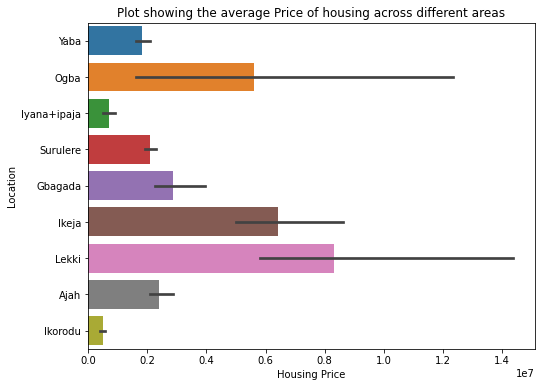

In [58]:
# Plot showing price variatons across various locations

plt.figure(figsize=(8,6))
#plt.xticks(rotation=90)
sns.barplot(y=df['area'],x=df['price'])

plt.title('Plot showing the average Price of housing across different areas')
plt.xlabel('Housing Price')
plt.ylabel('Location')
plt.show()

<AxesSubplot:xlabel='count', ylabel='area'>

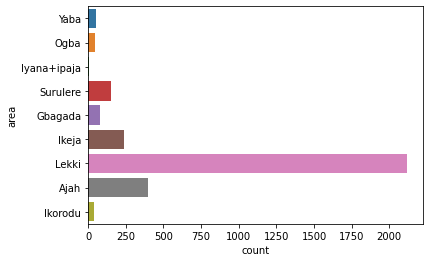

In [59]:
#plot to check count of properties with respect to locations

sns.countplot(y=df['area'])

In [63]:
#check dataframe of properties in Lekki

lekki_df = df[df["area"] == "Lekki"]
lekki_df.head()

,title,location,price,bath,bed,toilet,area
565,5 bedroom detached duplex,Chevron Drive,5000000,5,5,6,Lekki
566,2 bedroom flat,"Bluewaters Tower, Oniru, Victoria Island (VI),...",12000000,2,2,2,Lekki
567,3 bedroom flat,,5000000,3,3,4,Lekki
568,2 bedroom flat,Richmond Estate By Nike Art Gallery Ikate,5000000,2,2,2,Lekki
569,4 bedroom semi-detached duplex,"Diamond Estate, Sangotedo, Ajah, Lagos",3000000,4,4,5,Lekki


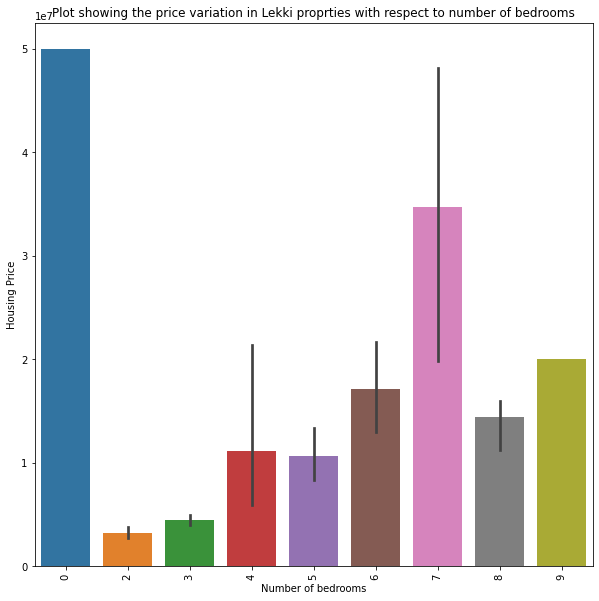

In [69]:
#view price variation with respect to number of bedrooms

plt.figure(figsize=(10,10))

sns.barplot(y=lekki_df['price'], x=lekki_df['bed'])
plt.xticks(rotation=90)

plt.title('Plot showing the price variation in Lekki proprties with respect to number of bedrooms')
plt.ylabel('Housing Price')
plt.xlabel('Number of bedrooms')
plt.show()